#### Name: **Shibu Mohapatra**
#### Branch: **MSC AI**
#### Roll no: **2**

## **Practical No: 1**

### **AIM:** Predict the stock of the company using RNN and LSTM networks.

### **CODE and OUTPUT**

In [62]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#pip install yfinance

In [63]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

import yfinance as yf
yf.pdr_override()

In [64]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'META']

In [65]:
# Set up End and Start times for data grab (We will analyze for 2 years)
# end = datetime.now()
# start = datetime(end.year - 2, end.month, end.day)
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [66]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [67]:
company_list = [AAPL, GOOG, TSLA, META]
company_name = ["APPLE", "GOOGLE", "TESLA", "FACEBOOK"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [68]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-09-21,104.540001,110.190002,103.099998,110.080002,108.767036,195713800,APPLE
2020-09-22,112.680000,112.860001,109.160004,111.809998,110.476387,183055400,APPLE
2020-09-23,111.620003,112.110001,106.769997,107.120003,105.842331,150718700,APPLE


In [69]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-14,153.330002,153.539993,149.050003,151.470001,151.470001,43064200,FACEBOOK
2022-09-15,149.800003,154.199997,148.699997,149.550003,149.550003,34606300,FACEBOOK
2022-09-16,148.050003,148.580002,144.289993,146.289993,146.289993,40018700,FACEBOOK


### **Adj Close**

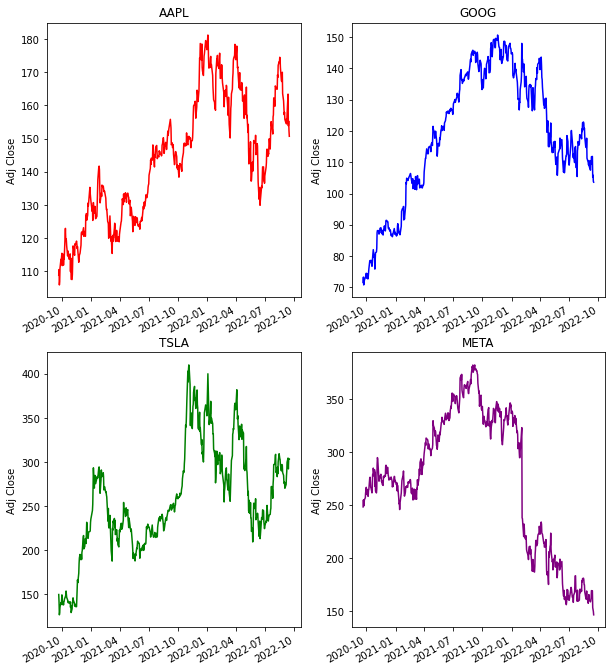

In [87]:
# Let's see a historical view of the closing price of companies

plt.figure(figsize=(10, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Red','Blue','Green','Purple']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colorlist[i-1])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

### **Volume**

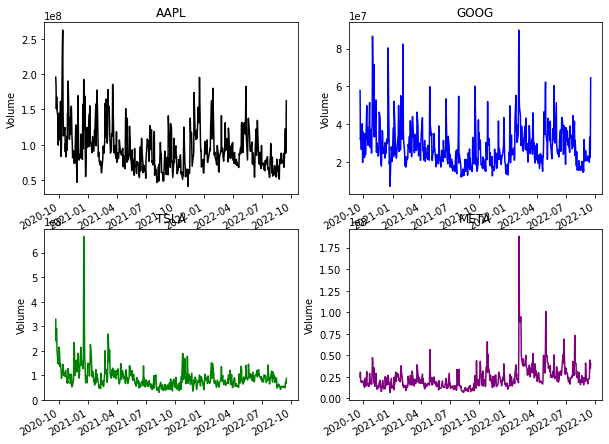

In [88]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Black','Blue','Green','Purple']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colorlist[i-1])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## The moving average of the various stocks

In [89]:
# Set the Moving Average Day
ma_day = [10, 20, 50]

In [90]:
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [91]:
print(AAPL.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


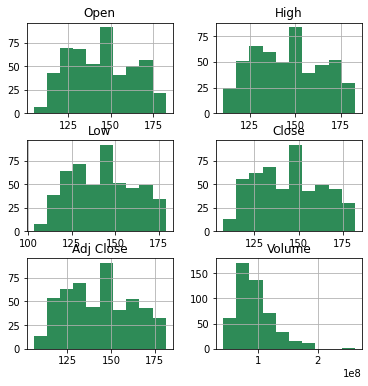

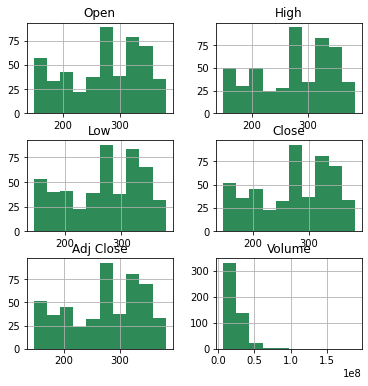

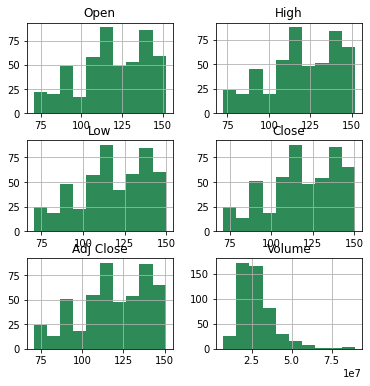

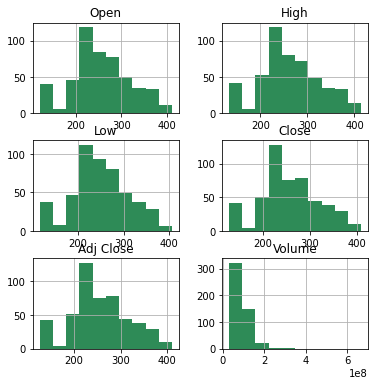

In [94]:
df.groupby("company_name").hist(figsize=(6, 6),color='seagreen');

#### Visualization of companies changes over various MA days and 'Adj Close'

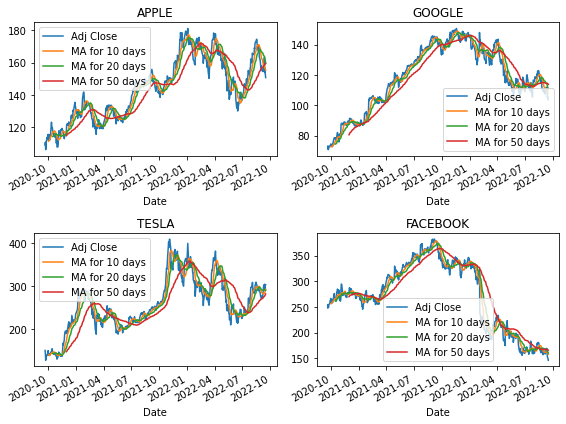

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(8)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('FACEBOOK')

fig.tight_layout()

#### The daily return of the stock on average.

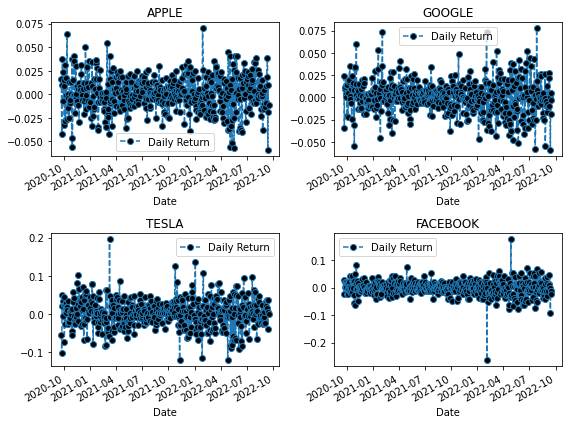

In [98]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(8)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[1,0].set_title('TESLA')

META['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[1,1].set_title('FACEBOOK')

fig.tight_layout()

APPLE Skewness: -0.065556
APPLE Kurtosis: 0.655643
GOOGLE Skewness: 0.139230
GOOGLE Kurtosis: 1.660866
TESLA Skewness: 0.177814
TESLA Kurtosis: 1.959376
FACEBOOK Skewness: -1.217960
FACEBOOK Kurtosis: 17.144717


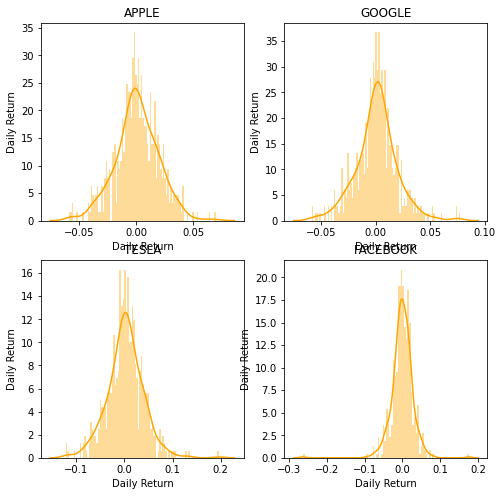

In [102]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(8, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='orange')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    # Skewness and Kurtosis
    print(f'{company_name[i - 1]}'+" Skewness: %f" % company['Daily Return'].skew())
    print(f'{company_name[i - 1]}'+" Kurtosis: %f" % company['Daily Return'].kurt())

#### The correlation between different stocks Adj Close prices.

In [104]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Let's take a quick look
closing_df.head(3) 

[*********************100%***********************]  4 of 4 completed


,AAPL,GOOG,META,TSLA
Date,,,,
2020-09-21,108.767029,71.557999,248.149994,149.796661
2020-09-22,110.476395,73.273003,254.750000,141.410004
2020-09-23,105.842339,70.760498,249.020004,126.786667


In [105]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head(3)

,AAPL,GOOG,META,TSLA
Date,,,,
2020-09-21,NaN,NaN,NaN,NaN
2020-09-22,0.015716,0.023967,0.026597,-0.055987
2020-09-23,-0.041946,-0.034290,-0.022493,-0.103411


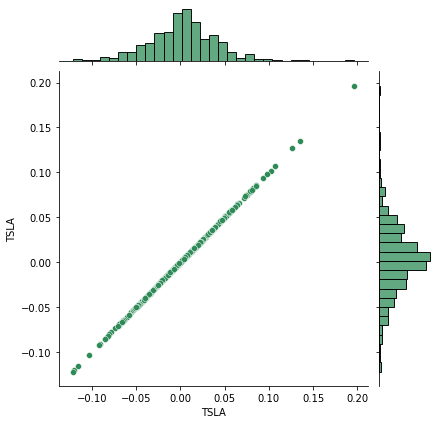

In [106]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('TSLA', 'TSLA', tech_rets, kind='scatter', color='seagreen')

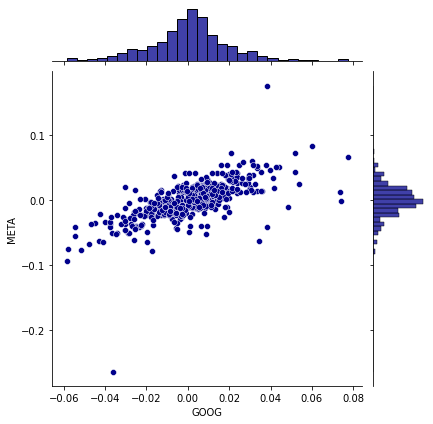

In [107]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'META', tech_rets, kind='scatter',color='darkblue')

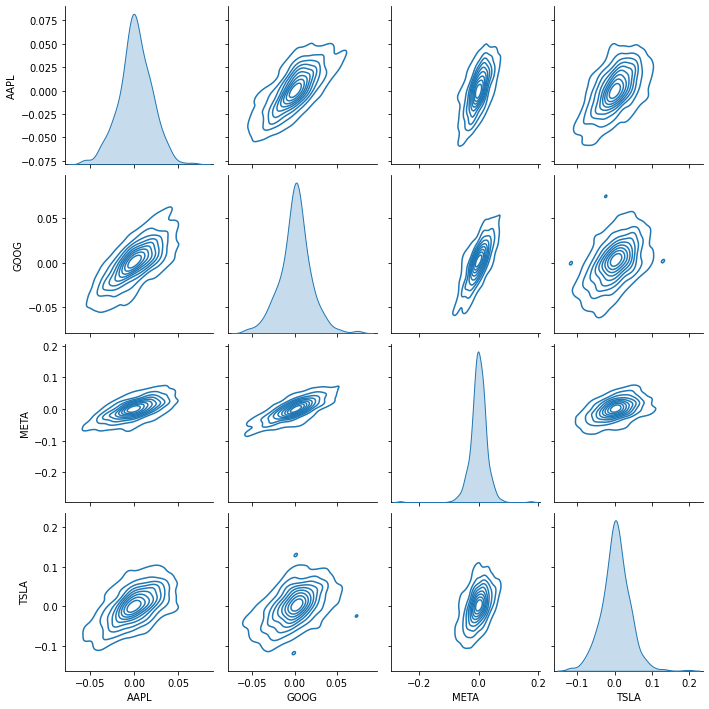

In [108]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='kde')

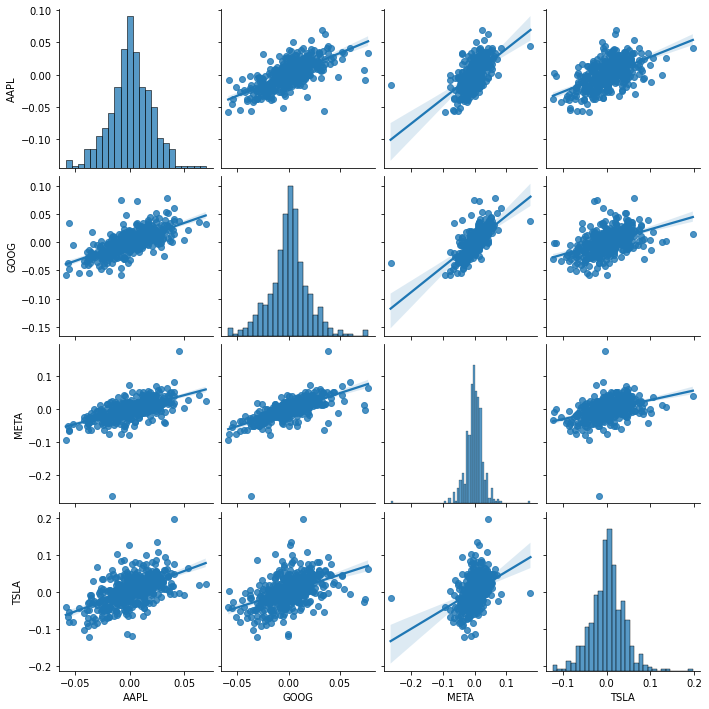

In [109]:
sns.pairplot(tech_rets, kind='reg')

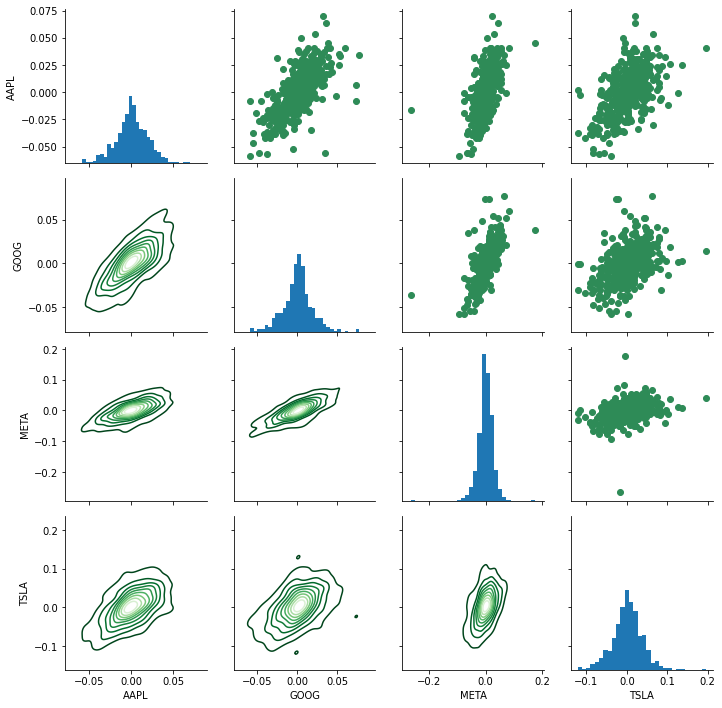

In [110]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='seagreen')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='Greens_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

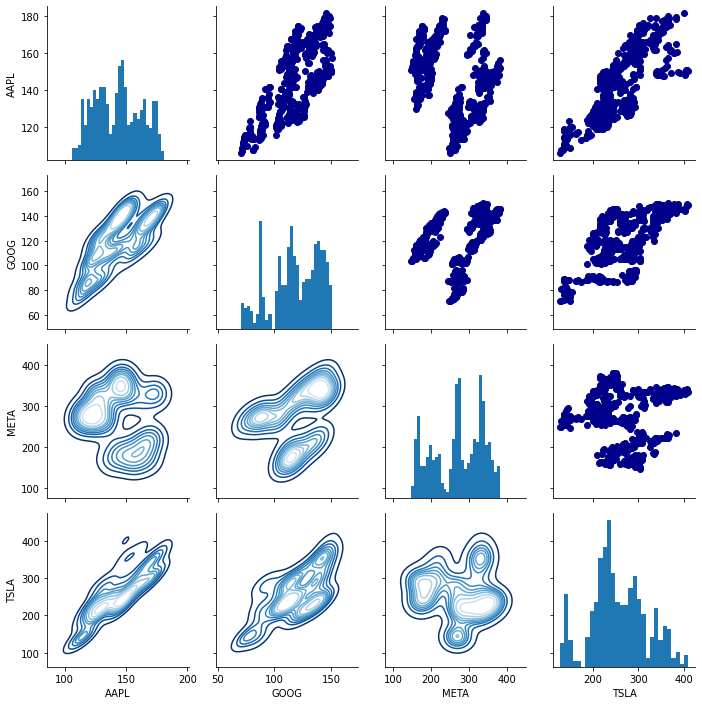

In [111]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='darkblue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='Blues_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

#### Correlation

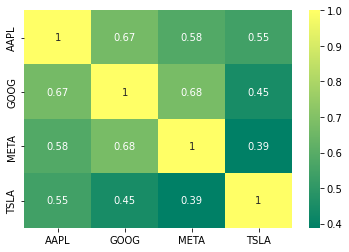

In [112]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

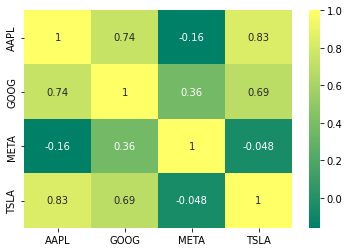

In [113]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

### Risk Analysis

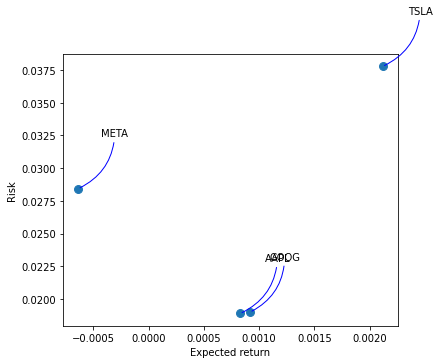

In [114]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(6, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

* **Selecting a company and concentrating on analysis on it**

In [115]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02,493.000000,483.000000,453.000000,501.000000
mean,144.283068,146.006733,142.631454,144.383606,143.598374,9.387373e+07,143.806332,143.967429,144.268477,0.000829
std,18.498906,18.688206,18.315680,18.509640,18.782038,3.106006e+07,18.337569,17.905461,16.390581,0.018898
min,104.540001,110.190002,103.099998,107.120003,105.842331,4.100000e+07,111.077140,113.988002,114.522138,-0.058680
25%,128.764996,130.182499,127.017500,128.724998,127.409071,7.258455e+07,128.147451,128.395369,128.146642,-0.009356
50%,144.415001,146.595001,143.394997,145.445000,144.611786,8.806720e+07,144.622701,144.542047,146.358471,0.000420
75%,159.584999,162.055000,156.672501,159.280003,158.893917,1.082706e+08,159.679242,161.194945,158.826682,0.012965
max,182.630005,182.940002,179.119995,182.009995,181.259918,2.623305e+08,177.597092,175.669070,171.991588,0.069778


In [116]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2020-09-21 to 2022-09-16
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            502 non-null    float64
 1   High            502 non-null    float64
 2   Low             502 non-null    float64
 3   Close           502 non-null    float64
 4   Adj Close       502 non-null    float64
 5   Volume          502 non-null    int64  
 6   company_name    502 non-null    object 
 7   MA for 10 days  493 non-null    float64
 8   MA for 20 days  483 non-null    float64
 9   MA for 50 days  453 non-null    float64
 10  Daily Return    501 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 47.1+ KB


In [117]:
Column_List = ["High", "Low","Open","Close", "Volume","Adj Close"]

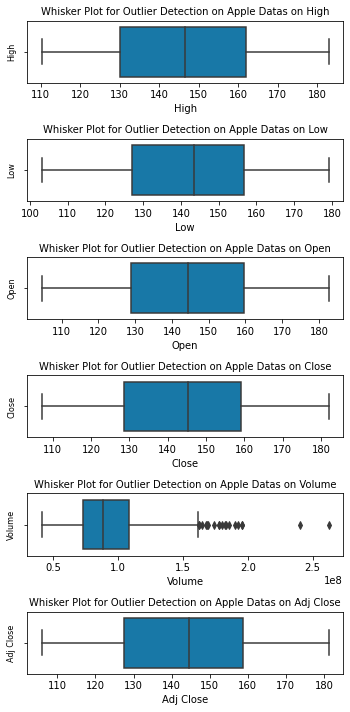

In [119]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_List), figsize = (5, 10))

for i, col_list in enumerate(Column_List):
    sns.boxplot(AAPL[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on Apple Datas on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

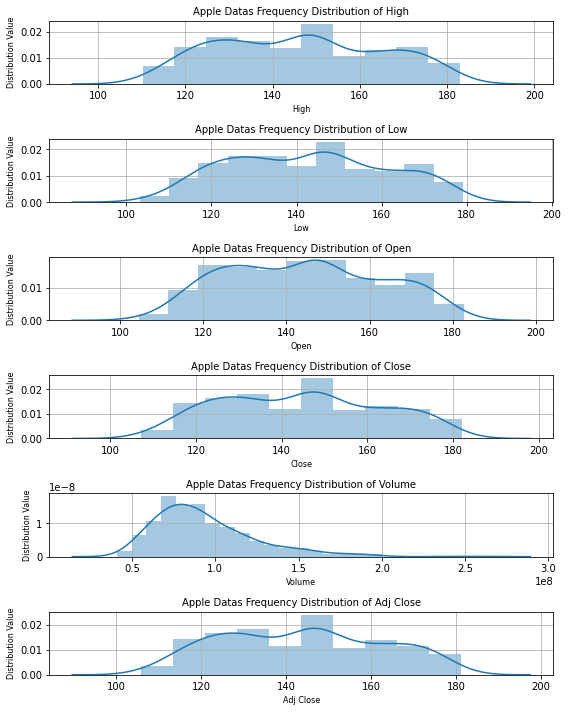

In [121]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (8, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(AAPL[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Apple Datas Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

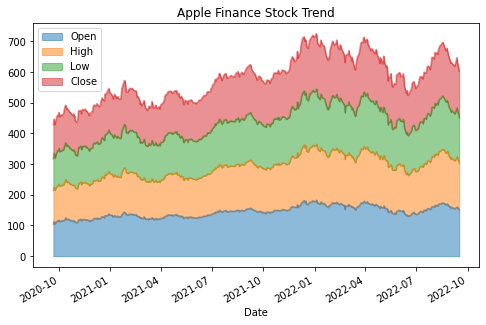

In [122]:
AAPL[["Open","High","Low","Close"]].plot.area(figsize=(8,5),alpha=0.5);
plt.title('Apple Finance Stock Trend')
plt.show()

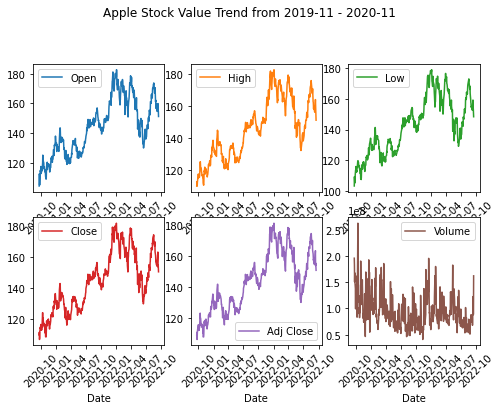

In [123]:
# A glimpse of how the market shares varied over the given time

# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
AAPL.plot(y = Column_List, subplots = True, layout = (3, 3), figsize = (8, 8), sharex = False, 
          title = "Apple Stock Value Trend from 2019-11 - 2020-11", rot = 45);

#### Predicting the closing price stock price of APPLE

In [125]:
#Get the stock quote
df = yf.download('AAPL', data_source='yahoo', start='2019-06-30', end='2020-06-30')
#Show teh data
df.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-01,50.792500,51.122501,50.162498,50.387501,49.110790,109012000
2019-07-02,50.352501,50.782501,50.340000,50.682499,49.398319,67740800
2019-07-03,50.820000,51.110001,50.672501,51.102501,49.807674,45448000


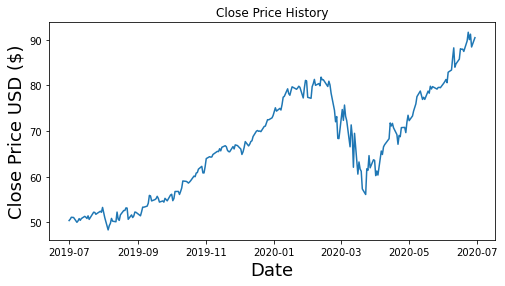

In [126]:
plt.figure(figsize=(8,4))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [127]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

202

In [128]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[0:5]

array([[0.04740462],
       [0.05421791],
       [0.06391828],
       [0.06287891],
       [0.0385704 ]])

* LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 60 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step.

In [129]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04740462, 0.05421791, 0.06391828, 0.06287891, 0.0385704 ,
       0.0456147 , 0.05710491, 0.04855941, 0.05750913, 0.0685375 ,
       0.06443792, 0.05779785, 0.07113579, 0.05340955, 0.08014322,
       0.08949708, 0.08851551, 0.07898844, 0.08314573, 0.09434723,
       0.08915066, 0.11374789, 0.08712972, 0.06166642, 0.        ,
       0.02113288, 0.03291181, 0.05825969, 0.04417119, 0.04122639,
       0.09024773, 0.05433341, 0.0485017 , 0.07598593, 0.09821589,
       0.0982736 , 0.11143832, 0.11039904, 0.05369827, 0.07592822,
       0.06247478, 0.07038514, 0.09047865, 0.08891974, 0.07136671,
       0.09151802, 0.11513368, 0.11501818, 0.12027254, 0.13488077,
       0.17466366, 0.17177666, 0.1467175 , 0.15335757, 0.15797679,
       0.16992902, 0.15947809, 0.14082799, 0.14654428, 0.14053927])]
[0.15988222213215986]

[array([0.04740462, 0.05421791, 0.06391828, 0.06287891, 0.0385704 ,
       0.0456147 , 0.05710491, 0.04855941, 0.05750913, 0.0685375 ,
       0.06443792, 0.05779785, 0.07

In [130]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


### **Creating LSTM Model**


In [131]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model_lstm.fit(x_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
8/8 [==============================] - 4s 62ms/step - loss: 0.1025
Epoch 2/20
8/8 [==============================] - 1s 63ms/step - loss: 0.0168
Epoch 3/20
8/8 [==============================] - 1s 63ms/step - loss: 0.0139
Epoch 4/20
8/8 [==============================] - 1s 64ms/step - loss: 0.0095
Epoch 5/20
8/8 [==============================] - 1s 65ms/step - loss: 0.0074
Epoch 6/20
8/8 [==============================] - 1s 62ms/step - loss: 0.0074
Epoch 7/20
8/8 [==============================] - 1s 68ms/step - loss: 0.0070
Epoch 8/20
8/8 [==============================] - 1s 121ms/step - loss: 0.0071
Epoch 9/20
8/8 [==============================] - 1s 121ms/step - loss: 0.0063
Epoch 10/20
8/8 [==============================] - 1s 115ms/step - loss: 0.0060
Epoch 11/20
8/8 [==============================] - 1s 65ms/step - loss: 0.0059
Epoch 12/20
8/8 [==============================] - 0s 61ms/step - loss: 0.0055
Epoch 13/20
8/8 [==============================] - 1s 67ms

### **Creating RNN model**

In [132]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
model_rnn = Sequential()

# adding first RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True,input_shape = (x_train.shape[1],1)))
model_rnn.add(Dropout(0.2))
# adding second RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model_rnn.add(Dropout(0.2))
# adding third RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = False))
model_rnn.add(Dropout(0.2))
# adding the output layer
model_rnn.add(Dense(units = 1))
# compiling RNN
model_rnn.compile(optimizer = "adam", loss = "mean_squared_error")
# fitting the RNN
model_rnn.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 [==============================] - 2s 45ms/step - loss: 1.2213
Epoch 2/100
5/5 [==============================] - 0s 42ms/step - loss: 0.4178
Epoch 3/100
5/5 [==============================] - 0s 44ms/step - loss: 0.2598
Epoch 4/100
5/5 [==============================] - 0s 41ms/step - loss: 0.3028
Epoch 5/100
5/5 [==============================] - 0s 42ms/step - loss: 0.2414
Epoch 6/100
5/5 [==============================] - 0s 41ms/step - loss: 0.2891
Epoch 7/100
5/5 [==============================] - 0s 40ms/step - loss: 0.1864
Epoch 8/100
5/5 [==============================] - 0s 43ms/step - loss: 0.1736
Epoch 9/100
5/5 [==============================] - 0s 41ms/step - loss: 0.1461
Epoch 10/100
5/5 [==============================] - 0s 41ms/step - loss: 0.1481
Epoch 11/100
5/5 [==============================] - 0s 40ms/step - loss: 0.1593
Epoch 12/100
5/5 [==============================] - 0s 45ms/step - loss: 0.1277
Epoch 13/100
5/5 [==============================]

In [133]:
# Get the LSTM model predicted price values 
predictions_lstm = model_lstm.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

In [134]:
# Get the RNN models predicted price values 
predictions_rnn = model_rnn.predict(x_test)
predictions_rnn = scaler.inverse_transform(predictions_rnn)

## **Models Scores**

In [135]:
from sklearn import metrics

# Get the root mean squared error (RMSE)
mse_lstm = metrics.mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print("LSTM Model RMSE: ",rmse_lstm)
# Get r2 score
r2_lstm = metrics.r2_score(y_test, predictions_lstm)
print("LSTM Model r2: ",r2_lstm)

LSTM Model RMSE:  3.527101514345204
LSTM Model r2:  0.7187461495856351


In [136]:
# Get the root mean squared error (RMSE)
mse_rnn = metrics.mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)

print("RNN Model RMSE: ",rmse_rnn)
# Get r2 score
r2_rnn = metrics.r2_score(y_test, predictions_rnn)
print("RNN Model r2: ",r2_rnn)

RNN Model RMSE:  3.2327699779030645
RNN Model r2:  0.7637280495485357


### **Plotting Train Data, Validation Data and Predictions RNN Model**

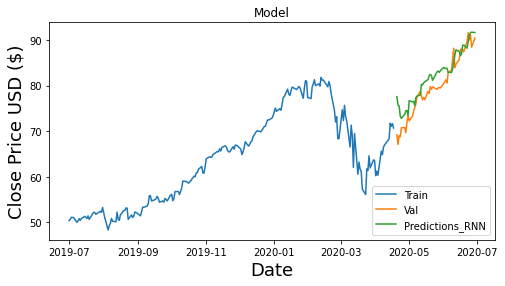

In [141]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_RNN'] = predictions_rnn
# Visualize the data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_RNN']])
plt.legend(['Train', 'Val', 'Predictions_RNN'], loc='lower right')
plt.show()

In [138]:
#Show the valid and predicted prices
valid[0:3]

,Close,Predictions_RNN
Date,,
2020-04-20,69.232498,77.584435
2020-04-21,67.092499,75.693077
2020-04-22,69.025002,75.561607


## **Plotting Train Data, Validation Data and Predictions LSTM Model**

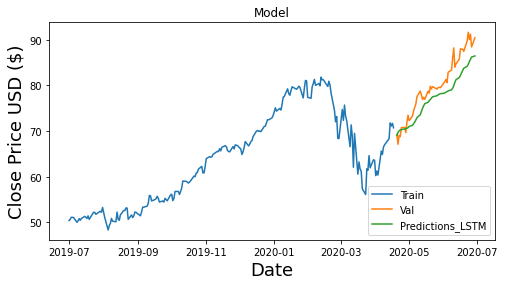

In [142]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_LSTM'] = predictions_lstm
# Visualize the data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
plt.legend(['Train', 'Val', 'Predictions_LSTM'], loc='lower right')
plt.show()

In [140]:
#Show the valid and predicted prices
valid[0:3]

,Close,Predictions_LSTM
Date,,
2020-04-20,69.232498,69.003174
2020-04-21,67.092499,69.681160
2020-04-22,69.025002,70.020836
